In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Co2 = Cargar datos desde el archivo CSV
df = pd.read_csv('C:\\Users\\JUAN DIAZ\\Desktop\\Projects\\DataNoob\\data\\Co2_World_Bank Data\\API_NY.ADJ.DCO2.CD_DS2_en_csv_v2_3480678.csv', skiprows=4, engine='python')

# Filtrar columnas desde 1980 hasta 2021 y 'Country Name'
columns_to_use = ['Country Name'] + [col for col in df.columns if col.isdigit() and 2014 <= int(col) <= 2021]
filtered_df = df[columns_to_use]

top_10_countries = (
    filtered_df.assign(Total_Emissions=filtered_df.iloc[:, 1:].sum(axis=1))
    .nlargest(10, 'Total_Emissions')
)

top_10_countries


# Iterar sobre las columnas
for column in top_10_countries.columns:
    # Verificar si la columna es numérica
    if pd.api.types.is_numeric_dtype(top_10_countries[column]):
        # Aplicar formato con separadores de miles y sin notación científica
        top_10_countries[column] = top_10_countries[column].apply(
            lambda x: f"{x:,.0f}" if pd.notnull(x) else x
        )

# Mostrar resultado
top_10_countries.head();

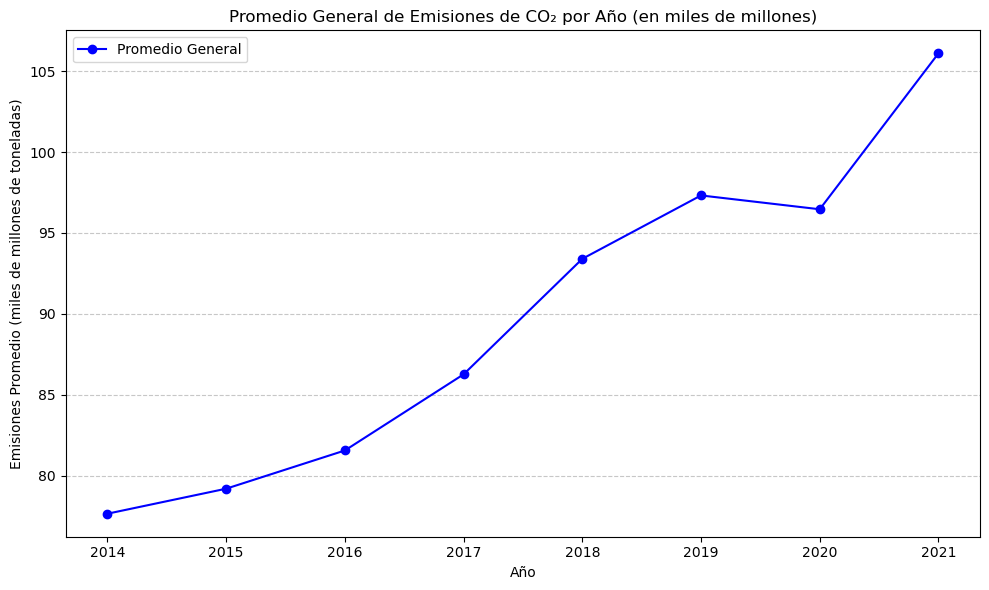

In [7]:
# Calcular el promedio de emisiones por año
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
average_emissions = (
    top_10_countries[years].replace(',', '', regex=True).astype(float).mean(axis=0) / 1e9
)  # Convertir a miles de millones

# Crear el gráfico de líneas para el promedio general
plt.figure(figsize=(10, 6))
plt.plot(
    years, 
    average_emissions, 
    marker='o', 
    linestyle='-', 
    color='b', 
    label='Promedio General'
)

# Configurar el gráfico
plt.title("Promedio General de Emisiones de CO₂ por Año (en miles de millones)")
plt.xlabel("Año")
plt.ylabel("Emisiones Promedio (miles de millones de toneladas)")
plt.xticks(years)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [15]:
file_path = 'https://berkeley-earth-temperature.s3.us-west-1.amazonaws.com/Global/Land_and_Ocean_complete.txt'
df = pd.read_csv(file_path, delimiter=r'\s+', comment='%', header=None, skiprows=41)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1850,1,-0.756,0.423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.213,0.514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.354,0.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.584,0.293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.626,0.239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Organized_headers
organized_headers = [
    'Year', 'Month', 'Monthly Anomaly', 'Monthly Unc', 
    'Annual Anomaly', 'Annual Unc', 'Five-year Anomaly', 'Five-year Unc', 
    'Ten-year Anomaly', 'Ten-year Unc', 'Twenty-year Anomaly', 'Twenty-year Unc'
]

# Confirm the length to ensure it matches the DataFrame
print("Length of organized_headers:", len(organized_headers))
print("Number of columns in df:", len(df.columns))

# set df.columns
if len(organized_headers) == len(df.columns):
    df.columns = organized_headers
    print("Headers set successfully!")
    print(df.head())
else:
    print("The number of headers still does not match the number of columns in the DataFrame.")

df.head()

Length of organized_headers: 12
Number of columns in df: 12
Headers set successfully!
   Year  Month  Monthly Anomaly  Monthly Unc  Annual Anomaly  Annual Unc  \
0  1850      1           -0.756        0.423             NaN         NaN   
1  1850      2           -0.213        0.514             NaN         NaN   
2  1850      3           -0.354        0.354             NaN         NaN   
3  1850      4           -0.584        0.293             NaN         NaN   
4  1850      5           -0.626        0.239             NaN         NaN   

   Five-year Anomaly  Five-year Unc  Ten-year Anomaly  Ten-year Unc  \
0                NaN            NaN               NaN           NaN   
1                NaN            NaN               NaN           NaN   
2                NaN            NaN               NaN           NaN   
3                NaN            NaN               NaN           NaN   
4                NaN            NaN               NaN           NaN   

   Twenty-year Anomaly  Twenty

,Year,Month,Monthly Anomaly,Monthly Unc,Annual Anomaly,Annual Unc,Five-year Anomaly,Five-year Unc,Ten-year Anomaly,Ten-year Unc,Twenty-year Anomaly,Twenty-year Unc
0,1850,1,-0.756,0.423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.213,0.514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.354,0.354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.584,0.293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.626,0.239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Find the row index for the year 2014
row_index_2014 = df[df['Year'] == 2014].index[0]

# Display the row index
print(f"The row index for the year 2014 is: {row_index_2014}")

# Access the row containing the year 2014
row_data_2014 = df.loc[row_index_2014]

# Display the row data
print(row_data_2014)

# Create df1 by filtering the original DataFrame df for years starting from 2014
df1 = df[df['Year'] >= 2014].reset_index(drop=True)

# Display the first few rows of the new DataFrame
df1.head()

The row index for the year 2014 is: 1968
Year                   2014.000
Month                     1.000
Monthly Anomaly           0.794
Monthly Unc               0.043
Annual Anomaly            0.751
Annual Unc                0.029
Five-year Anomaly         0.805
Five-year Unc             0.024
Ten-year Anomaly          0.818
Ten-year Unc              0.024
Twenty-year Anomaly       0.830
Twenty-year Unc           0.024
Name: 1968, dtype: float64


,Year,Month,Monthly Anomaly,Monthly Unc,Annual Anomaly,Annual Unc,Five-year Anomaly,Five-year Unc,Ten-year Anomaly,Ten-year Unc,Twenty-year Anomaly,Twenty-year Unc
0,2014,1,0.794,0.043,0.751,0.029,0.805,0.024,0.818,0.024,0.830,0.024
1,2014,2,0.588,0.043,0.765,0.029,0.808,0.024,0.821,0.024,0.833,0.024
2,2014,3,0.782,0.041,0.775,0.029,0.813,0.024,0.827,0.024,0.836,0.024
3,2014,4,0.859,0.041,0.787,0.029,0.818,0.024,0.831,0.024,0.839,0.024
4,2014,5,0.900,0.040,0.770,0.029,0.825,0.024,0.833,0.024,0.842,0.024


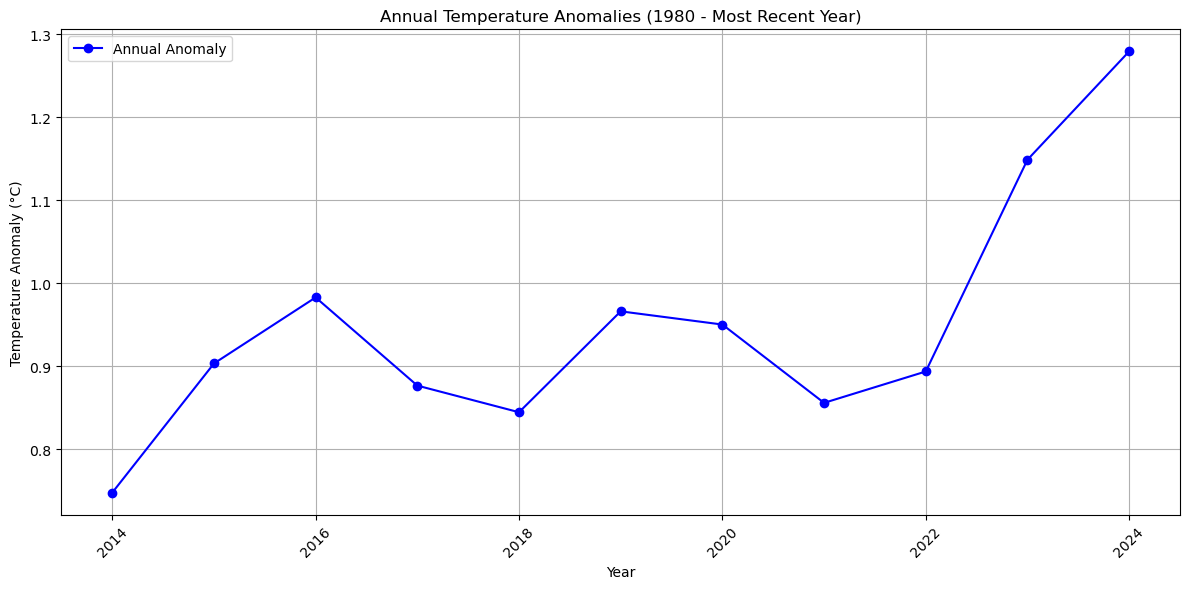

In [21]:
import matplotlib.pyplot as plt

# Group by year to calculate annual anomalies
annual_anomalies = df1.groupby('Year')['Annual Anomaly'].mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(annual_anomalies.index, annual_anomalies.values, marker='o', linestyle='-', color='b', label='Annual Anomaly')
plt.title('Annual Temperature Anomalies (1980 - Most Recent Year)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

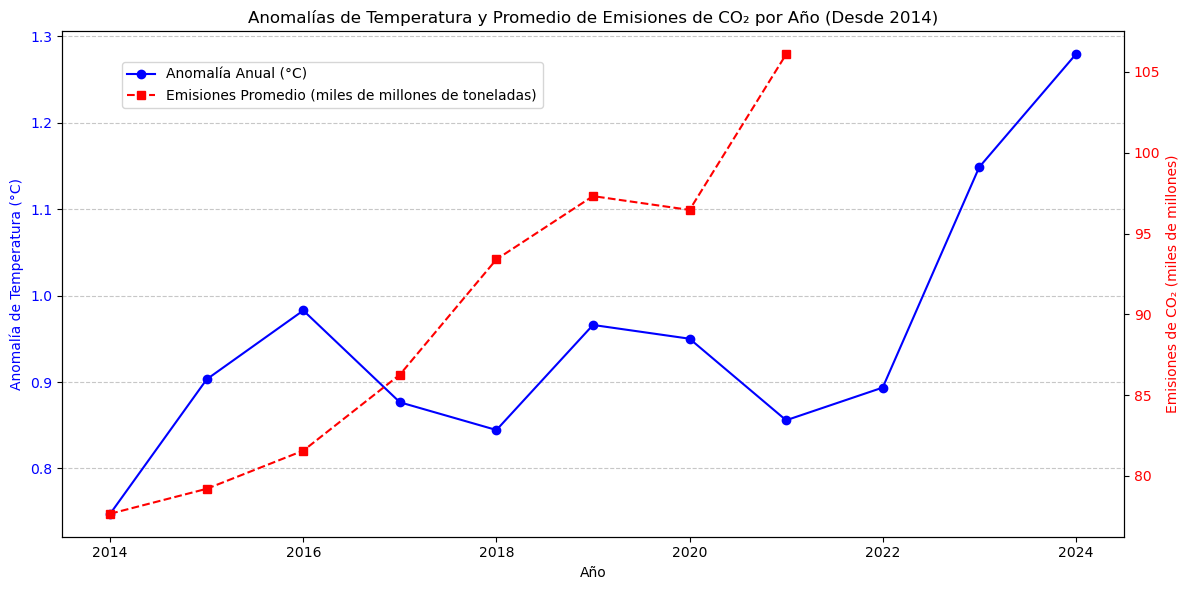

In [25]:
import matplotlib.pyplot as plt

# Filter data to start in 2014
filtered_anomalies = annual_anomalies.loc[annual_anomalies.index >= 2014]
filtered_years = [int(year) for year in years]  # Asegurar que 'years' esté en formato numérico

# Create combined chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Anomalías anuales (primary axis)
ax1.plot(
    filtered_anomalies.index, 
    filtered_anomalies.values, 
    marker='o', 
    linestyle='-', 
    color='b', 
    label='Anomalía Anual (°C)'
)
ax1.set_xlabel('Año')
ax1.set_ylabel('Anomalía de Temperatura (°C)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Segundo eje: Promedio de emisiones (eje secundario)
ax2 = ax1.twinx()
ax2.plot(
    filtered_years, 
    average_emissions, 
    marker='s', 
    linestyle='--', 
    color='r', 
    label='Emisiones Promedio (miles de millones de toneladas)'
)
ax2.set_ylabel('Emisiones de CO₂ (miles de millones)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Títulos y leyendas
plt.title('Anomalías de Temperatura y Promedio de Emisiones de CO₂ por Año (Desde 2014)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Mostrar el gráfico
plt.show()